In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [53]:
df = pd.read_csv("./datasets/mushroom/mushrooms.csv")

In [54]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [56]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [57]:
label = df["class"]
features = df.drop(columns = ["class"])

In [58]:
features = pd.get_dummies(features)

In [59]:
features

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [60]:
label = label.replace("p", 1)
label = label.replace("e", 0)

In [61]:
features.shape

(8124, 117)

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(117, input_shape = [117]),
    tf.keras.layers.Dense(117, activation = "relu"),
    tf.keras.layers.Dense(117, activation = "relu"),
    tf.keras.layers.Dense(117, activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [3]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [4]:
from ann_visualizer.visualize import ann_viz
import graphviz

graph = ann_viz(model, title = "Mushroom Model")

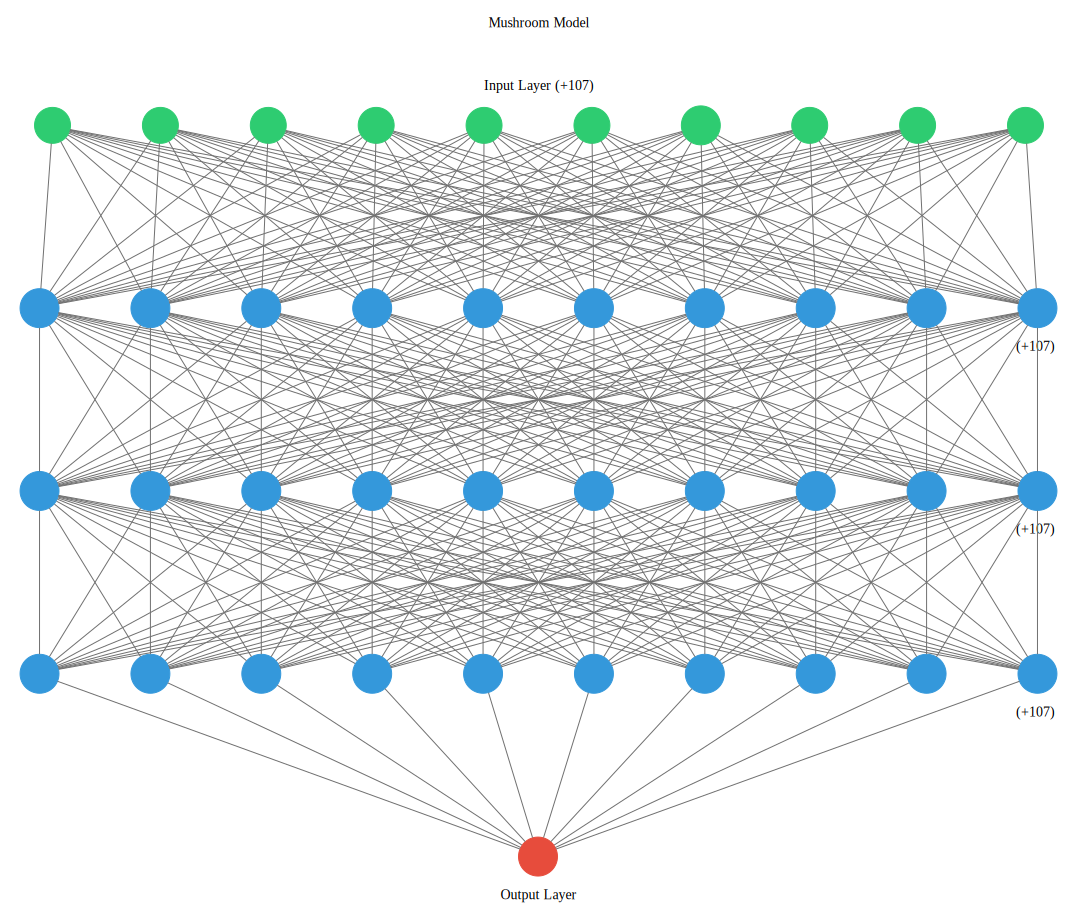

In [5]:
graph

In [64]:
history = model.fit(features, label, epochs = 5, validation_split = 0.2)

Epoch 1/5
204/204 [==============================] - 2s 6ms/step - loss: 0.0392 - accuracy: 0.9851 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 2/5
204/204 [==============================] - 1s 5ms/step - loss: 7.3928e-06 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9957
Epoch 3/5
204/204 [==============================] - 1s 5ms/step - loss: 5.9817e-05 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9951
Epoch 4/5
204/204 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0250 - val_accuracy: 0.9951
Epoch 5/5
204/204 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 0.9951


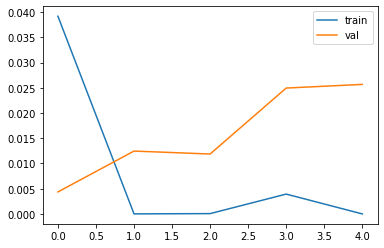

In [65]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "val"])
plt.show()

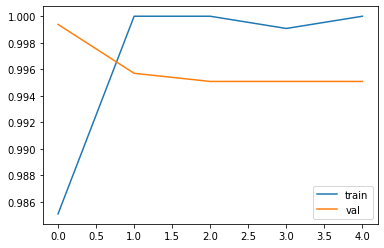

In [66]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show()